# Discovering Relationships with Measures of Association

## Environment Setup and Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

# Set style
sns.set_style("whitegrid") 
sns.set_palette('viridis')
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['font.family'] = 'monospace'

In [5]:
# Load data
potential_outcomes_df = pd.read_pickle('../data/potential_outcomes_df.pkl')
observational_df = pd.read_pickle('../data/observational_df.pkl')

## Causal Mechanisms

<center>
<img 
  src="../assets/confounding_bias.png" 
  alt="Confounding Relationships" 
  style="width:500px;height:auto;"
> 

In [8]:
# Observational data
observational_df.head()

,amu_signup,upsell_marketing,streaming_tier,play_days,songs_listened,other_subscriptions,retail_spending
0,0,0,1,0,0,0,35.0
1,0,1,0,30,120,0,0.0
2,0,1,0,0,0,1,0.0
3,0,0,1,0,0,0,35.0
4,0,0,1,0,0,0,35.0


### True Causal Effects


In [9]:
potential_outcomes_df.head()

,amu_signup,y_0_propensity,y_1_propensity,individual_treatment_effect,upsell_marketing,upsell_confounding_propensity,upsell_marketing_rct,streaming_tier,play_days,songs_listened,other_subscriptions,retail_spending
0,0,0.05,0.056537,0.006537,0,0.066149,1,1,0,0,0,35.0
1,0,0.05,0.273846,0.223846,1,0.896923,1,0,30,120,0,0.0
2,0,0.05,0.020000,-0.030000,1,0.320000,0,0,0,0,1,0.0
3,0,0.05,0.056537,0.006537,0,0.066149,1,1,0,0,0,35.0
4,0,0.05,0.056537,0.006537,0,0.066149,1,1,0,0,0,35.0


### Dangers of Unadjusted Estimates

Signup rates by treatment group:
upsell_marketing
0    0.048706
1    0.110350
Name: amu_signup, dtype: float64


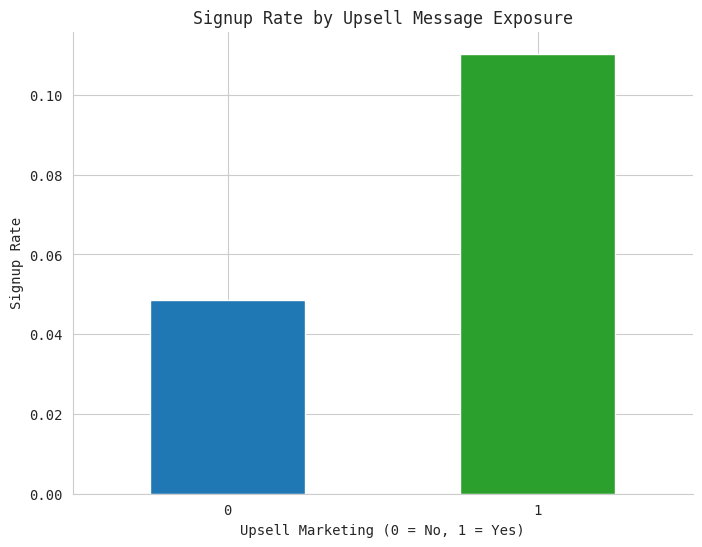

In [10]:
# Check treatment effect
signup_rate_by_treatment = potential_outcomes_df.groupby('upsell_marketing')['amu_signup'].mean()
print(f"Signup rates by treatment group:\n{signup_rate_by_treatment}")

# Plot distribution
plt.figure(figsize=(8, 6))
potential_outcomes_df.groupby('upsell_marketing')['amu_signup'].mean().plot(kind='bar', color=['tab:blue', 'tab:green'])
plt.title("Signup Rate by Upsell Message Exposure")
plt.xlabel("Upsell Marketing (0 = No, 1 = Yes)")
plt.ylabel("Signup Rate")
plt.xticks(rotation=0)
plt.show()

In [11]:
biased_lift = (
    (potential_outcomes_df['amu_signup'][potential_outcomes_df.upsell_marketing==1].mean()) - 
    (potential_outcomes_df['amu_signup'][potential_outcomes_df.upsell_marketing==0].mean())
)

actual_lift = potential_outcomes_df.individual_treatment_effect.mean()
print(
    f'Biased Marketing Lift: {biased_lift:.2%}',
    f'Acutal Marketing Lift: {actual_lift:.2%}', 
    sep='\n'
)

Biased Marketing Lift: 6.16%
Acutal Marketing Lift: 2.69%
